In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

F15_SA10_R05
   accX  accY  accZ  gyroX  gyroY  gyroZ  Index
0 -0.42 -4.85  0.19   -0.0   0.03  -0.00      0
1 -0.50 -4.85  0.19   -0.0   0.03  -0.01      1
2 -0.50 -4.83  0.27   -0.0   0.03  -0.00      2
3 -0.42 -4.94  0.21   -0.0   0.03  -0.01      3
4 -0.42 -4.87  0.19   -0.0   0.03  -0.00      4


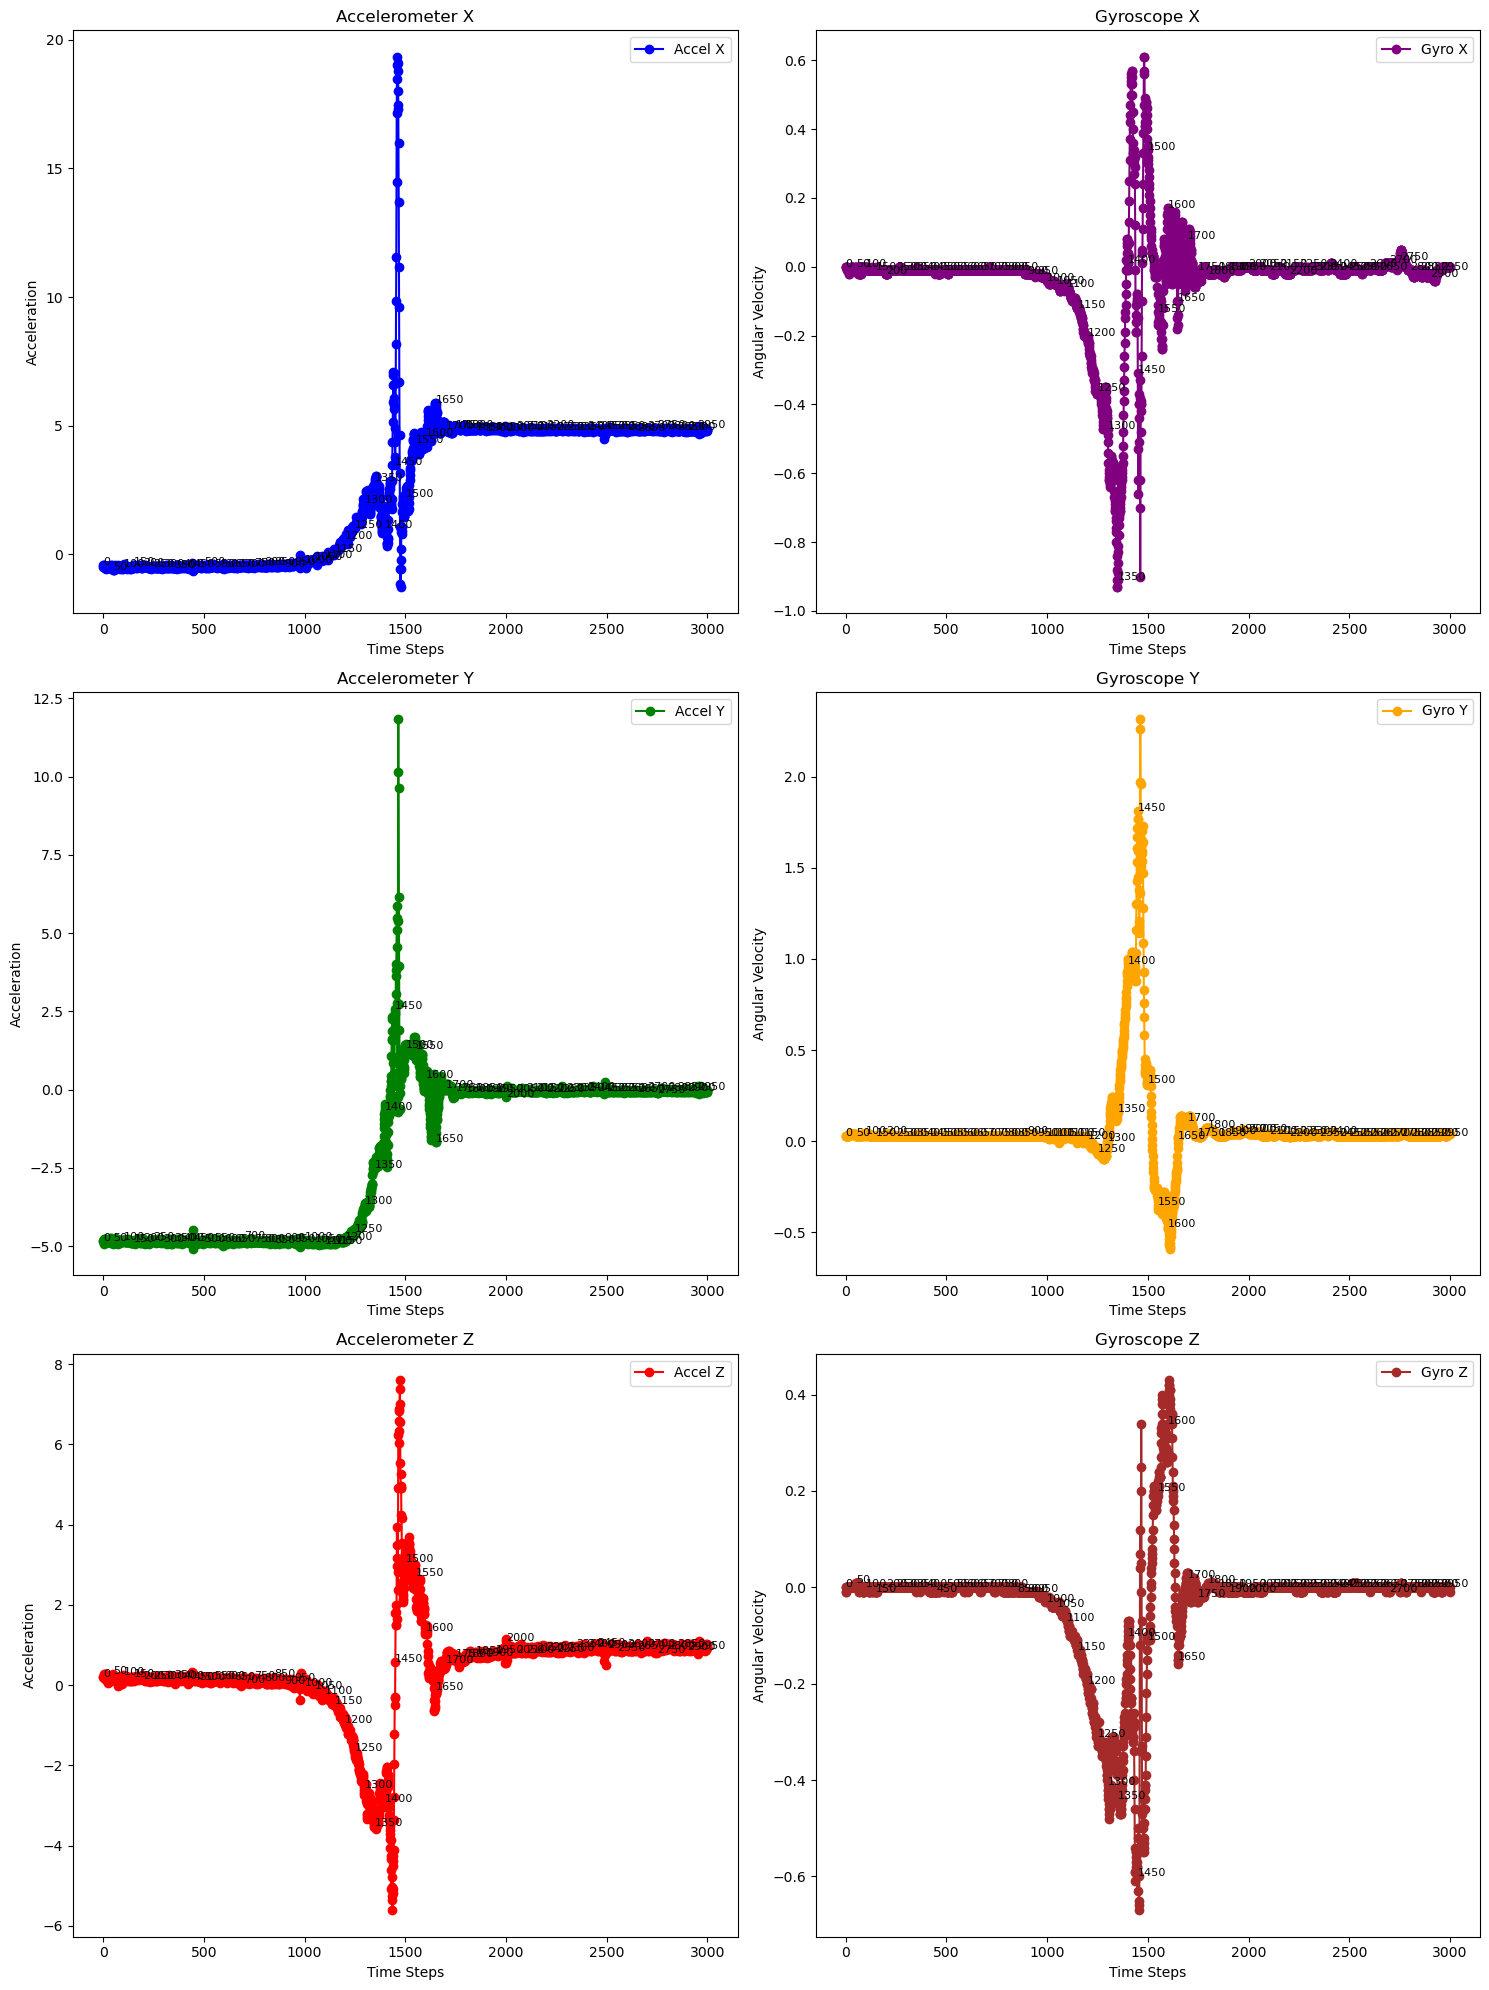

In [197]:
data_path = 'training_data/fall/F15_SA10_R05.csv'
str_name = str.split(data_path, "/")
name = str.split(str_name[2], ".")

data = pd.read_csv(data_path)
data['Index'] = data.index

print(name[0])
print(data.head())


import matplotlib.pyplot as plt

# Function to plot data with index annotations
def plot_with_index_annotations(x, y, label, color, ylabel, title, subplot_position, annotation_step=50):
    plt.subplot(subplot_position)
    plt.plot(x, y, color=color, label=label, marker='o')  # Added markers for each point
    for i in range(0, len(x), annotation_step):  # Annotate every 'annotation_step'th point
        plt.text(x[i], y[i], f'{x[i]}', fontsize=8)
    plt.xlabel('Time Steps')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

# Plotting accelerometer data with index annotations
plt.figure(figsize=(15, 20))

plot_with_index_annotations(data['Index'], data['accX'], 'Accel X', 'blue', 'Acceleration', 'Accelerometer X', 321)
plot_with_index_annotations(data['Index'], data['accY'], 'Accel Y', 'green', 'Acceleration', 'Accelerometer Y', 323)
plot_with_index_annotations(data['Index'], data['accZ'], 'Accel Z', 'red', 'Acceleration', 'Accelerometer Z', 325)

# Plotting gyroscope data with index annotations
plot_with_index_annotations(data['Index'], data['gyroX'], 'Gyro X', 'purple', 'Angular Velocity', 'Gyroscope X', 322)
plot_with_index_annotations(data['Index'], data['gyroY'], 'Gyro Y', 'orange', 'Angular Velocity', 'Gyroscope Y', 324)
plot_with_index_annotations(data['Index'], data['gyroZ'], 'Gyro Z', 'brown', 'Angular Velocity', 'Gyroscope Z', 326)

plt.tight_layout()
plt.show()

In [198]:
import matplotlib.pyplot as plt

start_index = 950

end_index = 1850


filtered_data = data[(data['Index'] >= start_index) & (data['Index'] <= end_index)]
filtered_data = filtered_data.drop(columns=['Index'])

print(filtered_data)

      accX  accY  accZ  gyroX  gyroY  gyroZ
950  -0.40 -4.87  0.10  -0.02   0.03  -0.01
951  -0.38 -4.90  0.08  -0.02   0.03  -0.01
952  -0.38 -4.81  0.04  -0.02   0.03  -0.01
953  -0.40 -4.87  0.04  -0.02   0.03  -0.01
954  -0.38 -4.90  0.08  -0.02   0.03  -0.01
...    ...   ...   ...    ...    ...    ...
1846  4.83 -0.04  0.82  -0.01   0.03  -0.00
1847  4.87 -0.08  0.73  -0.01   0.03  -0.00
1848  4.87 -0.04  0.77  -0.01   0.03  -0.00
1849  4.88 -0.06  0.82  -0.01   0.03  -0.00
1850  4.83 -0.06  0.77  -0.01   0.03  -0.00

[901 rows x 6 columns]


In [199]:
filtered_data.to_csv("./training_data/true/"+name[0]+".csv", index=False)